We want to show that Leap motion features (hand motion) varies more than Optitrack features (upper body motion)
To do that we would like to look at how much a signal is moving compared to another. We will assume that all the signals we have are related to the swarm motion.
We cannot look only at the variance of the raw signals since the variance depends on the amplitude of the signals.

In [2]:
data_folder = '..\\data_analysis\\data_analysis'

In [3]:
# needed to use modules/scripts from parent folder
import os,sys
print(sys.version)
sys.path.insert(1, os.path.join(sys.path[0], 'C:\\github\\HRI_mapping\\src'))

import HRI_mapping as HRI
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from settings.settings import get_settings
import sys
import json
import os
from matplotlib.backends.backend_pdf import PdfPages

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]


In [4]:
folders_motive = [os.path.join(data_folder,f) for f in os.listdir(data_folder) if 'motive' in f]
print(folders_motive)

['C:\\github\\HRI_mapping\\data_analysis\\optitrack_1_motive', 'C:\\github\\HRI_mapping\\data_analysis\\optitrack_3_motive', 'C:\\github\\HRI_mapping\\data_analysis\\optitrack_4_motive', 'C:\\github\\HRI_mapping\\data_analysis\\optitrack_5_motive']


In [5]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='bottom')
def multipage(filename, figs=None, dpi=200):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

In [6]:
evaluate_index = [9,8,7,6,3,10,11,12,13]
values_variance = []
for folder_subject in folders_motive:
    file = [os.path.join(folder_subject,f) for f in os.listdir(folder_subject) if os.path.isfile(os.path.join(folder_subject,f)) and 'mixed' in f][0]
    print(file)
    data_subject = pd.read_csv(file)
    values_variance.append({})
    for pos_feat in ['pos_x','pos_y','pos_z']:
        values_variance[-1][pos_feat] = {}
        for index in evaluate_index:
            feature = pos_feat+'_'+str(index)
            values_variance[-1][pos_feat][index] = np.var(data_subject[feature])

C:\github\HRI_mapping\data_analysis\optitrack_1_motive\mixed_period_5_amplitude_100_inst_9_2020_Jul_01_12_53_24PM.csv
C:\github\HRI_mapping\data_analysis\optitrack_3_motive\mixed_period_5_amplitude_100_inst_9_2020_Jul_03_03_45_48PM.csv
C:\github\HRI_mapping\data_analysis\optitrack_4_motive\mixed_period_5_amplitude_100_inst_9_2020_Jul_03_04_07_05PM.csv
C:\github\HRI_mapping\data_analysis\optitrack_5_motive\mixed_period_5_amplitude_100_inst_9_2020_Jul_03_07_04_15PM.csv


In [7]:
print(values_variance[0])
print(np.shape(values_variance))

{'pos_x': {9: 0.010172367128599315, 8: 0.1270300907905091, 7: 0.023110113128797467, 6: 0.00020043767687072769, 3: 0.0029168187619913037, 10: 0.00037810549254545543, 11: 0.018540034013178053, 12: 0.09832285479272024, 13: 0.01336579436491327}, 'pos_y': {9: 0.3384050620898997, 8: 0.04944061095358606, 7: 0.011350751449456084, 6: 2.3523583730662977e-05, 3: 0.00035029101254735706, 10: 1.6982665570864984e-05, 11: 0.015610102864752704, 12: 0.06120657310957278, 13: 0.384919952622791}, 'pos_z': {9: 0.003178044134709464, 8: 0.09636401495244007, 7: 0.03222945240056939, 6: 5.3015070040214574e-06, 3: 0.00010452109285748128, 10: 3.426154608172165e-06, 11: 0.018805099251436492, 12: 0.135150770031542, 13: 0.06073915238456568}}
(4,)


In [8]:
dict_mean = {}
dict_std = {}

for pos_feat in values_variance[0].keys():
    dict_mean[pos_feat] = {}
    dict_std[pos_feat] = {}
    for bone in values_variance[0][pos_feat].keys():
        list_values = []
        for subject in range(len(values_variance)):
            list_values.append(values_variance[subject][pos_feat][bone])
        dict_mean[pos_feat][bone] = np.mean(list_values)
        dict_std[pos_feat][bone] = np.std(list_values)
        

In [9]:
print(dict_mean)

{'pos_x': {9: 0.11639394819089441, 8: 0.08177888230555785, 7: 0.01499140481065525, 6: 0.0007810210063723548, 3: 0.018403980037525094, 10: 0.0007279030829514041, 11: 0.016449206560995133, 12: 0.0971393598194771, 13: 0.420613704902222}, 'pos_y': {9: 0.18669795267911468, 8: 0.021126369536242758, 7: 0.007653913917571474, 6: 1.711274761866547e-05, 3: 0.000505948080500092, 10: 1.3249858169872032e-05, 11: 0.010324035864686075, 12: 0.05046513542368991, 13: 0.37002633311660066}, 'pos_z': {9: 0.10054834341812686, 8: 0.057137935439290036, 7: 0.017292450658189948, 6: 0.00044242840024714367, 3: 0.01591629930842505, 10: 0.0005474482564199088, 11: 0.013554923184461755, 12: 0.11849163498899389, 13: 0.5441015463690124}}


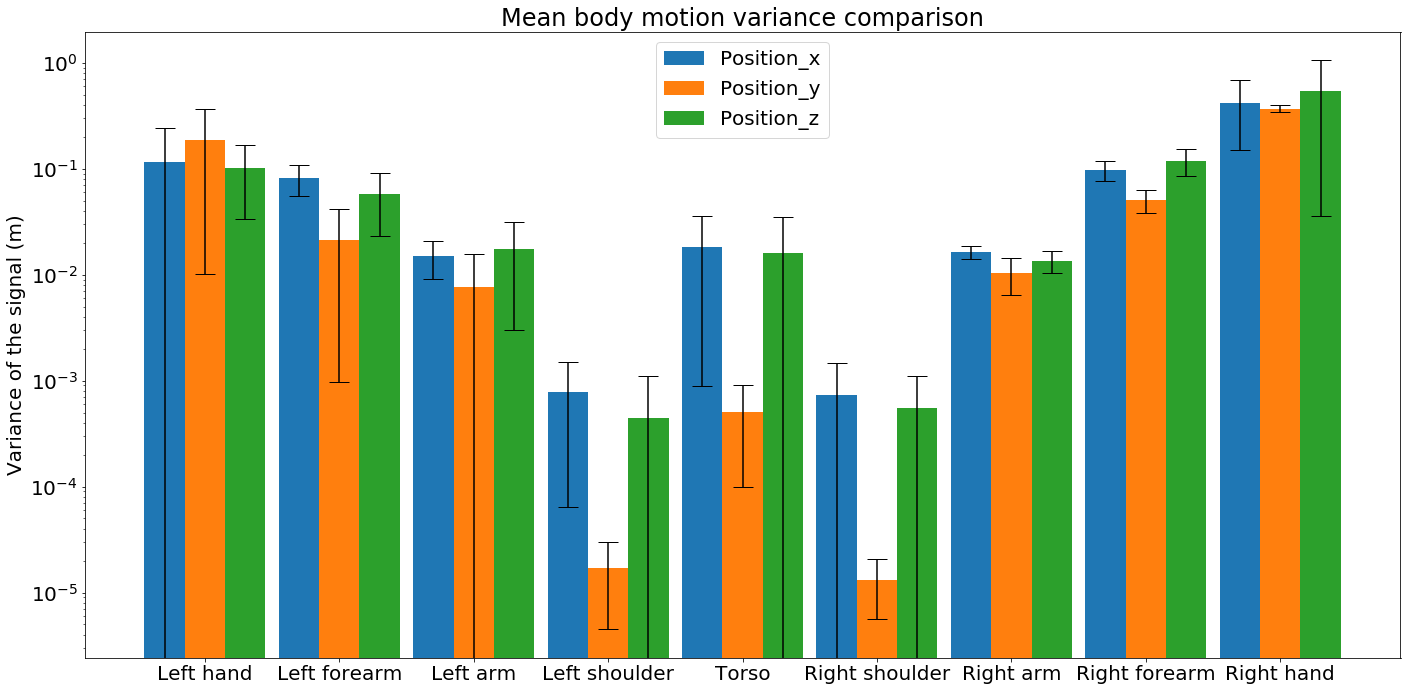

In [10]:
plt.rcParams.update({'font.size': 20})
labels = values_variance[0]['pos_x'].keys()   # bones
labels = ['Left hand', 'Left forearm','Left arm', 'Left shoulder','Torso','Right shoulder','Right arm','Right forearm','Right hand']
mean_pos_x = dict_mean['pos_x'].values()
mean_pos_y = dict_mean['pos_y'].values()
mean_pos_z = dict_mean['pos_z'].values()
std_pos_x = dict_std['pos_x'].values()
std_pos_y = dict_std['pos_y'].values()
std_pos_z = dict_std['pos_z'].values()

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width, mean_pos_x, width, yerr=std_pos_x, label='Position_x', capsize=10)
rects2 = ax.bar(x, mean_pos_y, width, yerr=std_pos_y, label='Position_y', capsize=10)
rects3 = ax.bar(x + width, mean_pos_z, width, yerr=std_pos_z, label='Position_z', capsize=10)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Variance of the signal (m)')
ax.set_title('Mean body motion variance comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yscale('log')

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

#plt.show()

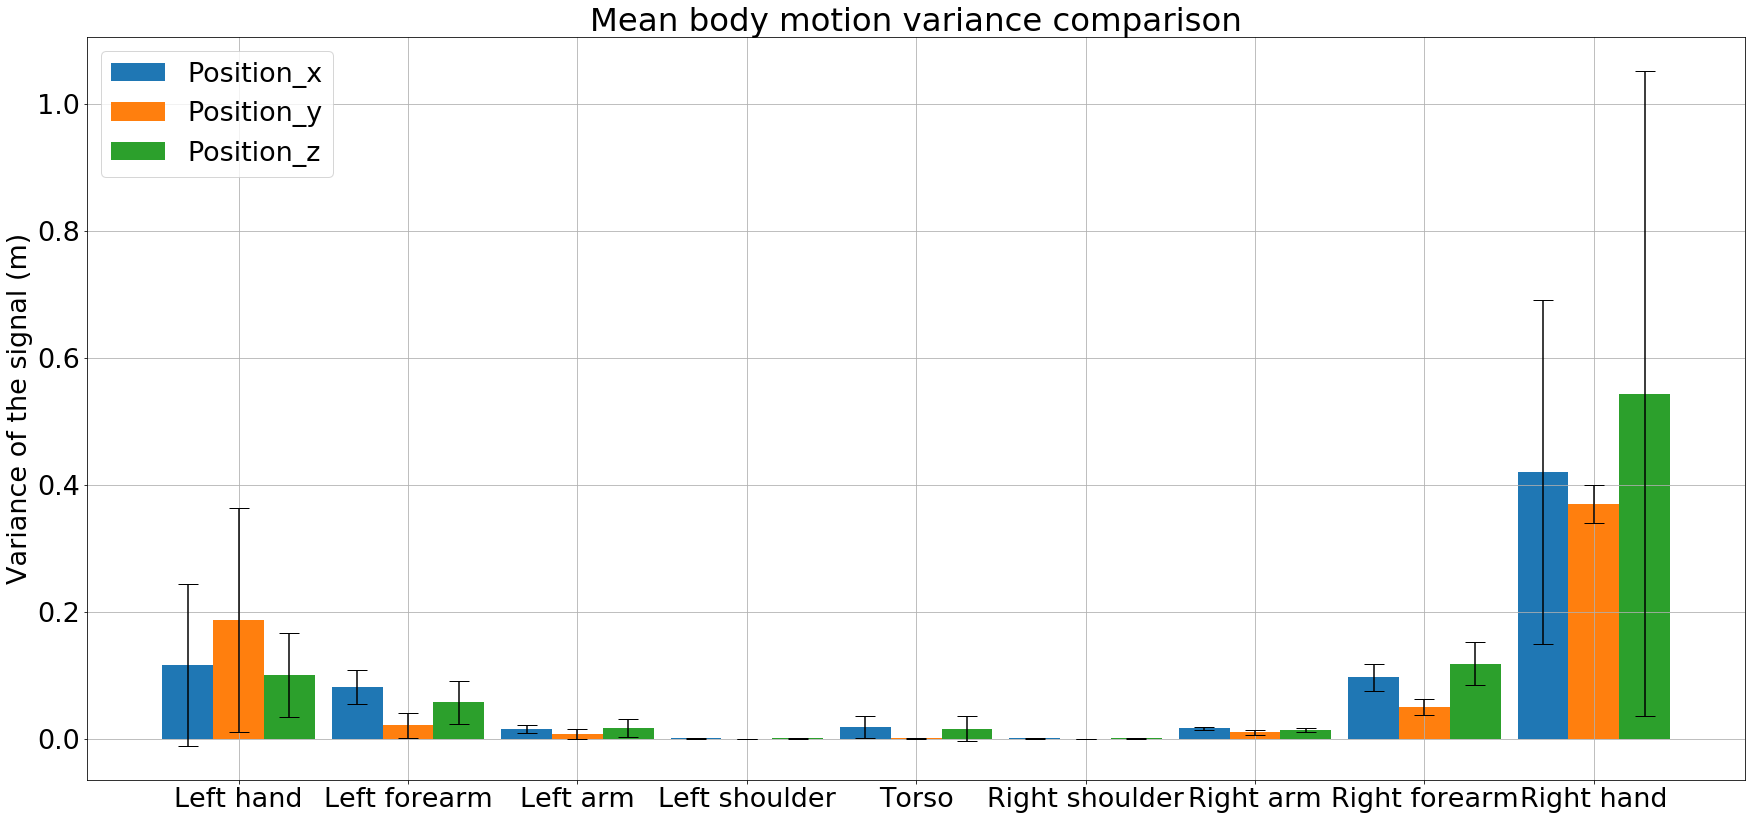

In [11]:
plt.rcParams.update({'font.size': 27})
labels = values_variance[0]['pos_x'].keys()   # bones
labels = ['Left hand', 'Left forearm','Left arm', 'Left shoulder','Torso','Right shoulder','Right arm','Right forearm','Right hand']
mean_pos_x = dict_mean['pos_x'].values()
mean_pos_y = dict_mean['pos_y'].values()
mean_pos_z = dict_mean['pos_z'].values()
std_pos_x = dict_std['pos_x'].values()
std_pos_y = dict_std['pos_y'].values()
std_pos_z = dict_std['pos_z'].values()

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(25,12))
rects1 = ax.bar(x - width, mean_pos_x, width, yerr=std_pos_x, label='Position_x', capsize=10)
rects2 = ax.bar(x, mean_pos_y, width, yerr=std_pos_y, label='Position_y', capsize=10)
rects3 = ax.bar(x + width, mean_pos_z, width, yerr=std_pos_z, label='Position_z', capsize=10)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Variance of the signal (m)')
ax.set_title('Mean body motion variance comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid()

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

#plt.show()

In [37]:
evaluate_index = [9,8,7,6,3,10,11,12,13]
values_variance = []
total_displacement = [[] for i in evaluate_index]    # Empty list, will contains for each bone index the 4 subjects total_displacement

for i,folder_subject in enumerate(folders_motive):
    file = [os.path.join(folder_subject,f) for f in os.listdir(folder_subject) if os.path.isfile(os.path.join(folder_subject,f)) and 'mixed' in f][0]
    print(file)
    data_subject = pd.read_csv(file)
    #print(data_subject)
    time = np.array(data_subject['timestamp'].values)
    for n,index in enumerate(evaluate_index):   # for one of the bones
        velocity_vector = []
        for pos_feat in ['pos_x','pos_y','pos_z']:
            feature = pos_feat+'_'+str(index)
            velocity = np.gradient(np.array(data_subject[feature].values),time)
            velocity_vector.append(velocity)
        #print(np.shape(velocity_vector),np.shape(time))
        velocity_norm = np.linalg.norm(velocity_vector,axis=0)
        total_displacement[n].append(np.trapz(velocity_norm,time))
print(total_displacement)
print(np.shape(total_displacement))

C:\github\HRI_mapping\data_analysis\optitrack_1_motive\mixed_period_5_amplitude_100_inst_9_2020_Jul_01_12_53_24PM.csv
C:\github\HRI_mapping\data_analysis\optitrack_3_motive\mixed_period_5_amplitude_100_inst_9_2020_Jul_03_03_45_48PM.csv
C:\github\HRI_mapping\data_analysis\optitrack_4_motive\mixed_period_5_amplitude_100_inst_9_2020_Jul_03_04_07_05PM.csv
C:\github\HRI_mapping\data_analysis\optitrack_5_motive\mixed_period_5_amplitude_100_inst_9_2020_Jul_03_07_04_15PM.csv
[[43.663084951937904, 187.44767683728173, 157.5361435854279, 58.15205560517354], [31.058183835325625, 144.38847030251256, 93.76562167633561, 30.6204972991243], [30.482172454833094, 64.19550981788453, 36.55350491069223, 30.76229930086348], [4.6159530320323485, 12.573830675885176, 12.663499463783989, 0.6492292129099486], [22.201683777602582, 89.59941224993986, 111.11069436410529, 2.913066353900789], [4.627059763558423, 15.774906957203767, 13.519699214999351, 0.682171067265516], [30.205125366968687, 30.513037242752628, 30.115

In [54]:
from matplotlib.pylab import savefig

def bar_multi(vals, error = None, xlabels = '', xticks = None, yticks = None, xlim = None, ylim = None, ylabel = '', title = '', legend = '', normalize = False, colors = None, w= None, ax = None, save = False, where = None):
    print(colors)    
    if colors is None:
        colors = 'rgbkmyc'    
    def norm_list(l, M_all = None):        
        if M_all is None:
            M = [max(i) for i in l]
            M_all = max(M)        
        list_l_norm = l[:]        
        for idx, i in enumerate(l):
            print(i)
            list_l_norm[idx] = np.array(i)/M_all
            print(i)        
        l = list_l_norm        
        return [l, M_all]    # make list of lists if not
    
    if type(vals[0]) is not list:
        vals = [vals]
#        for i in np.arange(len(vals)):
#            vals[i] = [vals[i]]    
    n_ticks = len(vals[0])
    l_each = len(vals)    
    
    no_legend = False
    if legend == '':
        no_legend = True
        legend = [''] * l_each    
        
    if ax is None:
        ax = plt.subplot(111)    
    
    plt.title(title)
    ax.grid('on')    
    ax.set_ylabel(ylabel)
    ax.set_xlabel("")    
    
    if normalize:        
        [vals, M] = norm_list(vals)        
        
        if error is not None:
            [error, _] = norm_list(error, M)    
            
    x = np.arange(n_ticks) + 1
    if w is None:
        w = 0.3    
        
    bars = []    
    
    for count, i in enumerate(vals):
        if error is None:
            bars.append(ax.bar(x - w*l_each/2 + w*(count + 1/2), i, width=w,align='center', label = legend[count], color = colors[count], ecolor = colors[count]))
        else:
            bars.append(ax.bar(x - w*l_each/2 + w*(count + 1/2), i, yerr=error[count],width=w,align='center', label = legend[count], color = colors[count], ecolor = colors[count]))    
            
    if not no_legend:
        ax.legend()    
        
    plt.xticks(x, xlabels, axes=ax)    
    
    if xlim is not None:
        plt.xlim(xlim)    
    if ylim is not None:
        plt.xlim(ylim)
    if xticks is not None:
        plt.xticks(xticks)    
    if yticks is not None:
        plt.yticks(yticks)    
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)    
    
    if save:
        savefig(where, bbox_inches='tight')    
        
    return ax

def boxplot_elegant(ax, data, position, c = 'b', whis = 1.5):    
    plt.boxplot(data, notch=None, positions = position, patch_artist=True,
                boxprops=dict(color=c, facecolor='none', linewidth=3),
                capprops=dict(color=c, linewidth=3),
                whiskerprops=dict(color=c, linewidth=3),
                flierprops=dict(color=c, markeredgecolor=c, linewidth=3),
                medianprops=dict(color=c, linewidth=3),
                whis = whis
                )
    
def make_fig_simple():
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    
    return [fig, ax]

def basic_box(data, col = 'b', tit = '', leg = False, labels = [], ax = None, save = False, where = None, y = '', xlim = None, ylim = None, xticks = None, yticks = None, whis = 1.5):    
    full = 1
    light = 0.6  
    low = 0
    c0 = np.array([low,low,full])
    c1 = np.array([light,light,full])
    c2 = np.array([full,low,low])   
    c3 = np.array([full,light,light])
    c4 = np.array([full,light,light])
    c5 = np.array([full,light,light])
    c6 = np.array([full,light,light])
    c7 = np.array([full,light,light])
    c8 = np.array([full,light,light])
    col = [c0, c1, c2, c3, c4, c5, c6, c7, c8]    
    if ax is None:
        plt.figure(figsize=(25,10))
        ax = plt.subplot(1, 1, 1)
        
    all_pos = []
    for idx, i in enumerate(data):         
        pos = 1+(idx)*0.5     
        boxplot_elegant(ax, i, [pos], col[idx], whis = whis)
        all_pos.append(pos)
        
    #ax.yaxis.grid()
    #ax.xaxis.grid()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)    
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if xticks is not None:
        plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)    
        
    plt.title(tit)    
    
    plt.xticks(all_pos, labels)    
    
    plt.xlim([all_pos[0]-0.2, all_pos[-1]+0.2])    
    
    plt.ylabel(y)    
    
    if leg:
        for idx,i in enumerate(labels):
            ax.scatter(0,0, color = col[idx], label = i)
            
        plt.legend(loc='lower left')
        # plt.legend()    
    if save:
        savefig(where, bbox_inches='tight')    
    
    return ax

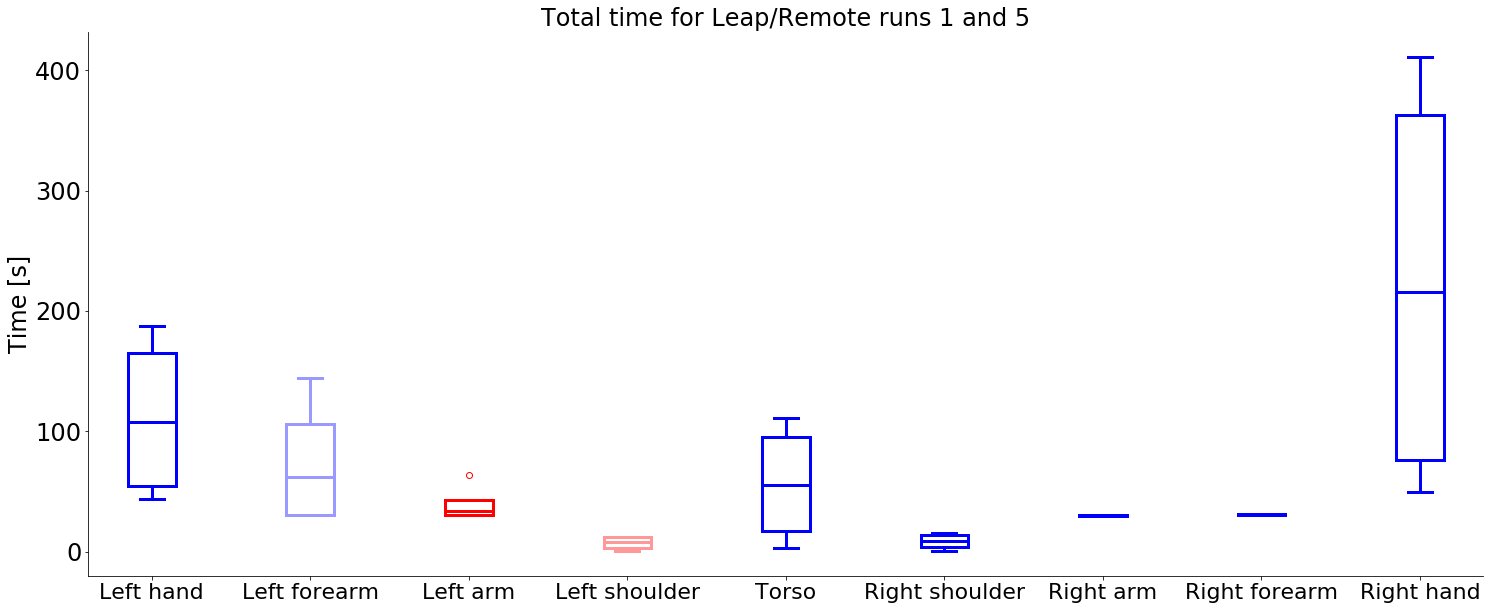

In [56]:
import matplotlib.pyplot as plt

SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

data = np.array(total_displacement)
labels = ['Left hand', 'Left forearm','Left arm', 'Left shoulder','Torso','Right shoulder','Right arm','Right forearm','Right hand']
ax = basic_box(data,tit = 'Body Motion total displacement',labels = labels, y = 'Total displacement', save = True, where = "C:\\Users\\defoo\\Desktop\\EPFL_paper\\Figures\\time_task\\boxplot_total_time_grid.pdf")
plt.show()
